**My First Portfolio**

This is my first markdown using Google Data Analytics Course. I will explain the work step by step in general from the raw data until the summary data. The datas is taken from the divy trip data in Internet.

1. Load the library

In [3]:
library (tidyverse)
library (lubridate)
library (ggplot2)

2. Upload the csv file into R

In [4]:
month_2021_11 <- read.csv("../input/yeartoyear-trip-data/202111-divvy-tripdata.csv")
month_2021_12 <- read.csv("../input/yeartoyear-trip-data/202112-divvy-tripdata.csv")
month_2022_01 <- read.csv("../input/yeartoyear-trip-data/202201-divvy-tripdata.csv")
month_2022_02 <- read.csv("../input/yeartoyear-trip-data/202202-divvy-tripdata.csv")
month_2022_03 <- read.csv("../input/yeartoyear-trip-data/202203-divvy-tripdata.csv")
month_2022_04 <- read.csv("../input/yeartoyear-trip-data/202204-divvy-tripdata.csv")
month_2022_05 <- read.csv("../input/yeartoyear-trip-data/202205-divvy-tripdata.csv")
month_2022_06 <- read.csv("../input/yeartoyear-trip-data/202206-divvy-tripdata.csv")
month_2022_07 <- read.csv("../input/yeartoyear-trip-data/202207-divvy-tripdata.csv")
month_2022_08 <- read.csv("../input/yeartoyear-trip-data/202208-divvy-tripdata.csv")
month_2022_09 <- read.csv("../input/yeartoyear-trip-data/202209-divvy-publictripdata.csv")
month_2022_10 <- read.csv("../input/yeartoyear-trip-data/202210-divvy-tripdata.csv")


3. Combine the data into a table

In [5]:
all_trips <- bind_rows(month_2021_11, month_2021_12, month_2022_01,
                       month_2022_02, month_2022_03, month_2022_04,
                       month_2022_05, month_2022_06, month_2022_07,
                       month_2022_08, month_2022_09, month_2022_10)

4. Checking the data. So we can be sure what is the data we're dealing with

In [6]:
colnames(all_trips)
dim(all_trips)
head(all_trips)
str(all_trips)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] 5755694      13

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,7C00A93E10556E47,electric_bike,2021-11-27 13:27:38,2021-11-27 13:46:38,,,,,41.93000,-87.72000,41.96,-87.73,casual
2,90854840DFD508BA,electric_bike,2021-11-27 13:38:25,2021-11-27 13:56:10,,,,,41.96000,-87.70000,41.92,-87.70,casual
3,0A7D10CDD144061C,electric_bike,2021-11-26 22:03:34,2021-11-26 22:05:56,,,,,41.96000,-87.70000,41.96,-87.70,casual
4,2F3BE33085BCFF02,electric_bike,2021-11-27 09:56:49,2021-11-27 10:01:50,,,,,41.94000,-87.79000,41.93,-87.79,casual
5,D67B4781A19928D4,electric_bike,2021-11-26 19:09:28,2021-11-26 19:30:41,,,,,41.90000,-87.63000,41.88,-87.62,casual
6,02F85C2C3C5F7D46,electric_bike,2021-11-26 18:34:07,2021-11-26 18:52:49,Michigan Ave & Oak St,13042,,,41.90086,-87.62379,41.90,-87.63,casual


'data.frame':	5755694 obs. of  13 variables:
 $ ride_id           : chr  "7C00A93E10556E47" "90854840DFD508BA" "0A7D10CDD144061C" "2F3BE33085BCFF02" ...
 $ rideable_type     : chr  "electric_bike" "electric_bike" "electric_bike" "electric_bike" ...
 $ started_at        : chr  "2021-11-27 13:27:38" "2021-11-27 13:38:25" "2021-11-26 22:03:34" "2021-11-27 09:56:49" ...
 $ ended_at          : chr  "2021-11-27 13:46:38" "2021-11-27 13:56:10" "2021-11-26 22:05:56" "2021-11-27 10:01:50" ...
 $ start_station_name: chr  "" "" "" "" ...
 $ start_station_id  : chr  "" "" "" "" ...
 $ end_station_name  : chr  "" "" "" "" ...
 $ end_station_id    : chr  "" "" "" "" ...
 $ start_lat         : num  41.9 42 42 41.9 41.9 ...
 $ start_lng         : num  -87.7 -87.7 -87.7 -87.8 -87.6 ...
 $ end_lat           : num  42 41.9 42 41.9 41.9 ...
 $ end_lng           : num  -87.7 -87.7 -87.7 -87.8 -87.6 ...
 $ member_casual     : chr  "casual" "casual" "casual" "casual" ...


5. Adding 5 new columns.  
a. Date. We focused on the started date since it reflects the start of renting  
b. Year. We prepare the data that contains different year.  
c. Month. We can know the data if we need for specific month.  
d. Day. We separate spesifically for the date.  
e. Day_of_week. To easier analyze, we can add the new column for the type of day so we can be sure about the effects for weekdays and weekend. 

In [7]:
all_trips$date <- as.Date(all_trips$started_at)
all_trips$year <- format(all_trips$date, "%Y")
all_trips$month <- format(all_trips$date, "%m")
all_trips$day <- format(all_trips$date, "%d")
all_trips$day_of_week <- format(all_trips$date, "%A")

6. Show the total day of week to ensure there is no bad data

In [8]:
all_trips %>% count(day_of_week)

day_of_week,n
<chr>,<int>
Friday,815654
Monday,774657
Saturday,939671
Sunday,792931
Thursday,839620
Tuesday,788110
Wednesday,805051


7. Adding time different to know the duration

In [9]:
all_trips$ride_length <- difftime(all_trips$ended_at, all_trips$started_at)
all_trips$ride_length <- as.numeric(as.character(all_trips$ride_length))

8. Checking for the bad data, especially the null value of start station name and minus value of time different

In [10]:
all_trips %>% count((start_station_name == "") | (is.na(start_station_name)))
all_trips %>% count(ride_length < 0)

"(start_station_name == """") | (is.na(start_station_name))",n
<lgl>,<int>
FALSE,4877517
TRUE,878177


ride_length < 0,n
<lgl>,<int>
FALSE,5755582
TRUE,112


9. Clean the bad data by inserting the clean data into a new variable

In [11]:
all_trips_v2 <- all_trips[!(all_trips$start_station_name == "" | is.na(all_trips$start_station_name)|all_trips$ride_length<0),]

10. Calculate the descriptive analysis like median, mean, etc.

In [12]:
summary(all_trips_v2$ride_length)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0     362     635    1235    1141 2483235 

11. Do comparison between annual members and casual members

In [13]:
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = mean)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = median)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = min)
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = max)

all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,1905.9729
member,772.3995


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,824
member,538


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,0
member,0


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,2483235
member,93594


12. Compare the data for day of week in a year-to-year data

In [14]:
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)

all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
<chr>,<chr>,<dbl>
casual,Friday,1831.7712
member,Friday,756.8946
casual,Monday,1914.6011
member,Monday,746.9502
casual,Saturday,2120.3852
member,Saturday,866.7139
casual,Sunday,2203.6463
member,Sunday,859.1639
casual,Thursday,1663.3408


13. The day of week is needed to be sorted. So it will be sorted and calculated again

In [15]:
all_trips_v2$day_of_week <- ordered(all_trips_v2$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))
aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)

all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length
<chr>,<ord>,<dbl>
casual,Sunday,2203.6463
member,Sunday,859.1639
casual,Monday,1914.6011
member,Monday,746.9502
casual,Tuesday,1702.1567
member,Tuesday,735.4691
casual,Wednesday,1627.4296
member,Wednesday,732.1665
casual,Thursday,1663.3408


14. Summarize the result with focused on the type of rider and weekday

In [16]:
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n(), average_duration =mean(ride_length)) %>% 
  arrange(member_casual, weekday)

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,weekday,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Sun,339967,2203.6463
casual,Mon,240890,1914.6011
casual,Tue,221475,1702.1567
casual,Wed,230219,1627.4296
casual,Thu,256575,1663.3408
casual,Fri,283510,1831.7712
casual,Sat,416388,2120.3852
member,Sun,332319,859.1639
member,Mon,418648,746.9502


15. Visualize the number of riders vs rider of type

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


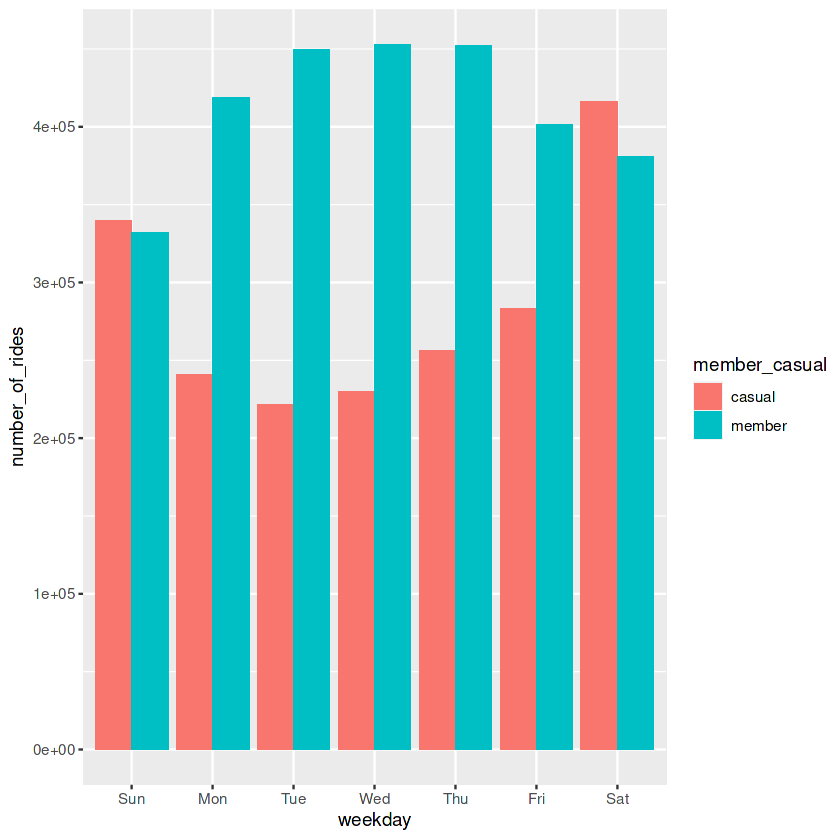

In [17]:
# all_trips_v2 %>% 
#   mutate(weekday = wday(started_at, label = TRUE)) %>% 
#   group_by (member_casual, weekday) %>% 
#   summarise(number_of_rides = n(), average_duration = mean(ride_length)) %>% 
#   arrange(member_casual, weekday) %>% 
#   ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
#   geom_col(position = "dodge")

picture_1 <- all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by (member_casual, weekday) %>% 
  summarise(number_of_rides = n(), average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday) %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual))

picture_1 + geom_col(position = "dodge")

16. Visualize the duration of lengh vs rider of type

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


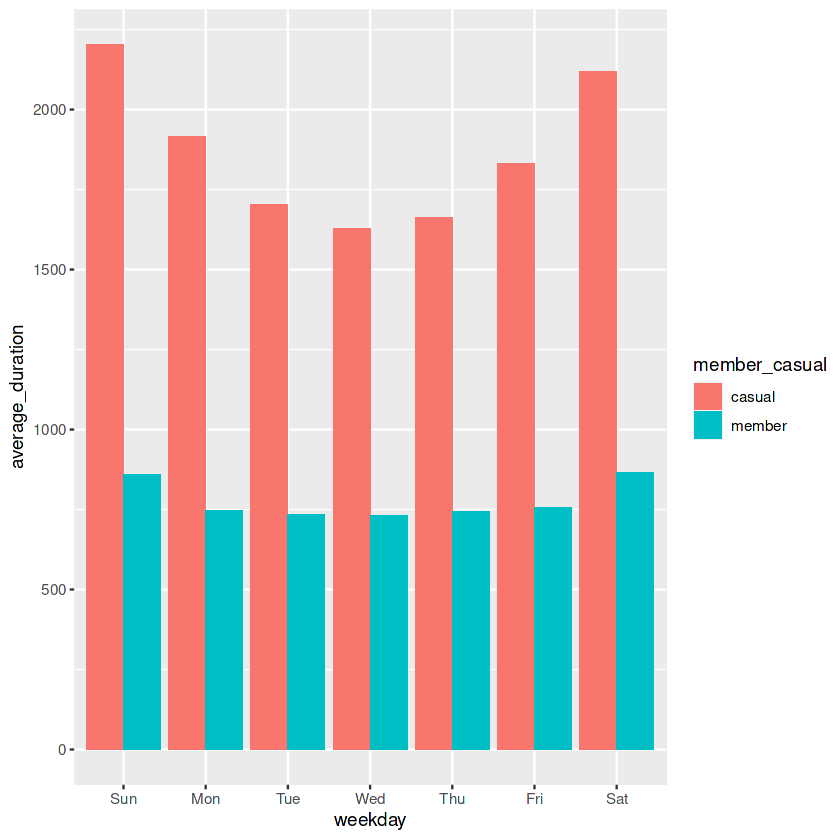

In [18]:
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by (member_casual, weekday) %>% 
  summarise(number_of_rides = n(), average_duration = mean(ride_length)) %>% 
  arrange(member_casual, weekday) %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge")

The ready-to-share version is created in PPT format. You can access here. https://sites.google.com/view/graveoportfolio/home